# Demonstração Operacional do Protocolo de Integridade Digital via Cifra de Integridade Primal (CIP)

**Registro operacional associado ao livro**  
*Descobrindo o Caos nos Números — Como a ordem emerge quando mudamos a forma de observar*  
© Alvaro Costa, 2025  

Este notebook integra a sequência canônica de **registros computacionais da Cifra de Integridade Primal (CIP)**.

Ele **não introduz hipóteses, conjecturas, modelos matemáticos ou argumentos conceituais novos**.  
Seu papel é exclusivamente operacional.

O objetivo deste registro é **demonstrar, por execução direta**, o funcionamento dos verbos do protocolo CIP  
em um ambiente controlado, determinístico e reprodutível.

A fundamentação matemática, conceitual e epistemológica do protocolo encontra-se integralmente desenvolvida no livro.  
Este notebook não interpreta resultados, não defende o protocolo e não substitui a leitura teórica.

Ele **registra**.

As operações aqui executadas — assinatura, verificação, cifragem, decifragem e interoperabilidade estrutural —  
devem produzir resultados observáveis e auditáveis, independentes de plataforma, ambiente ou confiança institucional.

Se o protocolo for correto, ele se sustenta por execução.  
Se não for, nenhuma formulação teórica o resgata.

**Licença:** Creative Commons BY–NC–ND 4.0  

É permitida a leitura, execução e citação acadêmica.  
Não é permitida a modificação do conteúdo, redistribuição adaptada ou uso comercial independente.


# CIP — Cifra de Integridade Primal

## Protocolo Público de Integridade Digital

### Demonstração Institucional — Notebook Reprodutível

Este notebook documenta, de forma **pública, executável e verificável**, o funcionamento integral do **Protocolo de Integridade Digital  
baseado na Cifra de Integridade Primal (CIP)**.

O objetivo não é apresentar uma proposta teórica, nem um conceito experimental, mas **demonstrar um protocolo operacional**, já implementado  
em C++, capaz de:

* detectar qualquer alteração estrutural em um artefato digital,
* inclusive modificações mínimas, da ordem de **1 único bit**,
* de forma **determinística, auditável e independente de plataforma**.

A demonstração cobre o **ciclo completo e fechado** do protocolo:

1. **Assinar** — geração da prova de integridade;
2. **Verificar** — validação independente da integridade;
3. **Cifrar** — preservação da confidencialidade;
4. **Decifrar** — reversão íntegra, com verificação final.

Todo o experimento é conduzido com o **binário oficial da CIP**, em modo demonstração, incluindo o contador interno de operações **protegido  
pela própria CIP**.

> **Não há segredos criptográficos neste notebook.**  
> A segurança não depende de chaves privadas, segredos institucionais ou obscuridade.  
> Ela decorre exclusivamente de uma **estrutura aritmética pública e verificável**.

---

## Sumário Executivo

1. **A GOE aritmética é um fenômeno estrutural, não heurístico.**  
   Ela emerge diretamente da organização dos números primos e é reprodutível, independente do observador, da máquina ou do método de cálculo.

2. **A CIP traduz esse fenômeno em um protocolo de integridade digital.**  
   A coerência espectral do arquivo é usada como critério objetivo:    qualquer ruptura estrutural — inclusive de 1 bit — é denunciada sem  
ambiguidade.

4. **O protocolo é intrinsecamente interoperável.**  
   Assinaturas geradas em Linux e Windows são verificadas pelo mesmo binário nativo, sem ajustes, compatibilizações ou exceções de implementação.  

5. **O ciclo assinar–verificar–cifrar–decifrar é matematicamente coerente.**  
   A mesma estrutura que denuncia a corrupção garante a reversão íntegra do conteúdo. Não há etapas frágeis nem dependências externas.

6. **O impacto institucional é imediato.**  
   Cadeias de custódia, arquivos públicos, sistemas financeiros, justiça, defesa, ciência aberta e infraestrutura crítica passam a dispor de um  
**critério objetivo e independente para integridade digital**.

A fundamentação teórica que sustenta a estrutura espectral do protocolo está disponível em:

> Costa, A. (2025). *The Arithmetic Mirror: Deterministic Emergence of GOE Statistics from the Prime Structure*.
> Zenodo. [https://doi.org/10.5281/zenodo.17643156](https://doi.org/10.5281/zenodo.17643156)

---

## Modos de Operação da CIP

A CIP opera em dois modos formais. Ambos seguem **o mesmo protocolo**, mas com **profundidades distintas**, adequadas a contextos operacionais  
diferentes.

A distinção é objetiva e relevante para auditoria, documentação técnica e uso institucional.

---

### 1. Modo Padrão (default)

O modo padrão realiza uma verificação otimizada:

* Avalia **15 blocos distribuídos** ao longo do arquivo (5 iniciais, 5 centrais, 5 finais);
* Produz chaves e auditorias compactas;
* Adequado a operações recorrentes e de alto volume;
* Detecta qualquer alteração estrutural relevante.

**Uso típico:** integridade operacional cotidiana.

---

### 2. Modo Total (`-t`)

O modo total executa a verificação estrutural completa:

* Avalia **100% dos blocos** do arquivo;
* Embute a **matriz de projeção integral** diretamente na chave CIP-T;
* Gera uma assinatura vetorial completa e perpétua;
* Mantém interoperabilidade plena entre SDKs e plataformas;
* Recomendado para:

  * setor público,
  * cadeia de custódia,
  * documentos oficiais,
  * preservação digital,
  * decisões críticas de alto valor.

**Uso típico:** auditoria, custódia, integridade institucional.

---

### Comparativo Objetivo

| Propriedade        | Modo Padrão     | Modo Total    |
| ------------------ | --------------- | ------------- |
| Blocos verificados | 15 (amostrados) | 100%          |
| Matriz embutida    | Parcial         | Integral      |
| Tamanho da chave   | Menor           | Maior         |
| Finalidade         | Operacional     | Institucional |
| Cadeia de custódia | Adequado        | Recomendado   |
| Detecção de 1 bit  | Parcial         | Completa      |

<br>

> Em termos práticos:
> o modo padrão atende à integridade corrente;
> o modo total elimina qualquer margem de ambiguidade.

---

### Observação final
Este notebook **não argumenta** a favor da CIP. Ele **executa** a CIP.

A integridade aqui demonstrada não é uma convenção, mas uma **propriedade estrutural verificável**.

## 1. Pré-requisitos

Este notebook é **autocontido** e pode ser executado diretamente no **Google Colab**, sem necessidade de instalação manual de SDKs ou ferramentas  
externas.

Para a execução completa, é necessário apenas:

* uma conta Google (opcional, para reexecutar as células no Colab);
* acesso à internet para download dos artefatos públicos (arquivo de teste e chaves CIP-T).

🔹 **O binário da CIP já está incluído no fluxo do notebook.**
Durante a execução, o notebook baixa automaticamente um **binário oficial da CIP**, compilado especificamente para o ambiente do Colab:

* sistema operacional: Linux
* compilação: `C++` (OpenMP + Eigen)
* índice espectral do SDK local: **IDX 0**

Esse binário é utilizado **exclusivamente como motor de verificação**, e serve como referência neutra para validar chaves produzidas por **outros SDKs**,  
com **outros índices espectrais** e em **outros sistemas operacionais**.

> **Não é necessário possuir SDKs locais, certificados ou infraestrutura criptográfica prévia.**

---

### Observação fundamental sobre o modelo de segurança

> **A CIP não utiliza infraestrutura de PKI.**  
> Não depende de certificados digitais, RSA, ECDSA, chaves privadas ou autoridade certificadora.  
> Não há segredos institucionais, tokens ocultos ou material confidencial.

A integridade é garantida **exclusivamente** pela coerência estrutural entre:

* o conteúdo do arquivo,
* a base harmônica associada ao índice espectral (IDX),
* e a matriz registrada na chave CIP-T.

---

### Natureza da execução

Todas as operações realizadas neste notebook:

* **invocam diretamente o binário nativo da CIP**, compilado em `C++`;
* não executam nenhuma lógica criptográfica em Python;
* não reimplementam o protocolo;
* não dependem de bibliotecas Python para segurança.

O notebook atua apenas como **orquestrador experimental**, documentando:

* chamadas reais ao executável,
* tempos de execução,
* auditorias geradas,
* e os resultados objetivos de verificação.

Não há execução interpretada do protocolo. Não há simulação. Não há abstração didática.

O que é mostrado aqui é o **comportamento real do protocolo em operação**.


In [1]:
# =================================================================
# CÉLULA 1 — Preparação autocontida do SDK CIP (Colab / Linux)
# =================================================================

import os
import stat
import json
import requests
import shutil
import zipfile
import time
import subprocess
import random
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from tqdm import tqdm

# ------------------------------------------------------------
# 1. Diretório base do notebook (Colab)
# ------------------------------------------------------------
BASE_DIR = Path.cwd()
print(f"[INFO] Diretório base do notebook: {BASE_DIR}")

# ------------------------------------------------------------
# 2. SDK CIP — binário único para o Colab (IDX 0)
# ------------------------------------------------------------
ZIP_NAME = "cip-sdk-linux-idx0.zip"
SDK_FOLDER = "cip-sdk-linux-idx0"
DOWNLOAD_URL = "https://delta-cip.com.br/downloads/colab/cip-sdk-linux-idx0.zip"

ZIP_PATH = BASE_DIR / ZIP_NAME
SDK_DIR = BASE_DIR / SDK_FOLDER

print(f"[INFO] Ambiente: Google Colab (Linux)")
print(f"[INFO] SDK esperado: {ZIP_NAME}")
print(f"[INFO] Diretório do SDK: {SDK_DIR}")

# ------------------------------------------------------------
# 3. Download do SDK (se necessário)
# ------------------------------------------------------------
if not SDK_DIR.exists():

    if not ZIP_PATH.exists():
        print("[INFO] Baixando SDK CIP oficial para o Colab...")
        with requests.get(DOWNLOAD_URL, stream=True) as r:
            r.raise_for_status()
            with open(ZIP_PATH, "wb") as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)
        print(f"[OK] Download concluído: {ZIP_PATH}")
    else:
        print(f"[OK] ZIP já disponível: {ZIP_PATH}")

    print("[INFO] Extraindo SDK...")
    with zipfile.ZipFile(ZIP_PATH, "r") as z:
        z.extractall(BASE_DIR)

    print("[OK] SDK extraído com sucesso.")

else:
    print("[OK] SDK já presente localmente.")

# ------------------------------------------------------------
# 4. Binário CIP (único, Linux)
# ------------------------------------------------------------
CIP_BIN = SDK_DIR / "bin" / "cip"

if not CIP_BIN.exists():
    raise FileNotFoundError(f"[ERRO] Binário CIP não encontrado em: {CIP_BIN}")

# Permissão de execução
st = os.stat(CIP_BIN)
os.chmod(CIP_BIN, st.st_mode | stat.S_IXUSR | stat.S_IXGRP | stat.S_IXOTH)

print(f"[OK] Binário CIP pronto para uso: {CIP_BIN}")

# ------------------------------------------------------------
# 5. Diretórios de trabalho
# ------------------------------------------------------------
STRESS_DIR = BASE_DIR / "stress_test"
STRESS_DIR.mkdir(exist_ok=True)

print(f"[OK] Diretório de trabalho criado: {STRESS_DIR}")

# ------------------------------------------------------------
# 6. Limite operacional (1 GB)
# ------------------------------------------------------------
LIMITE_BYTES = 1_000_000_000
print(f"[OK] Limite operacional definido: {LIMITE_BYTES/1e6:.1f} MB")


[INFO] Diretório base do notebook: /home/alvaro/descobrindo_caos/notebooks
[INFO] Ambiente: Google Colab (Linux)
[INFO] SDK esperado: cip-sdk-linux-idx0.zip
[INFO] Diretório do SDK: /home/alvaro/descobrindo_caos/notebooks/cip-sdk-linux-idx0
[OK] SDK já presente localmente.
[OK] Binário CIP pronto para uso: /home/alvaro/descobrindo_caos/notebooks/cip-sdk-linux-idx0/bin/cip
[OK] Diretório de trabalho criado: /home/alvaro/descobrindo_caos/notebooks/stress_test
[OK] Limite operacional definido: 1000.0 MB


## CÉLULA 2 — Arquivo público de grande porte para teste de integridade estrutural

Nesta etapa, utilizamos um **arquivo público, estável e volumoso** como objeto de teste da integridade espectral da CIP.

O arquivo escolhido é o **Global Summary of the Day (GSOD)** da NOAA, referente ao ano de 2023, com aproximadamente **100 MB**. Trata-se de um conjunto  
de dados amplamente utilizado em climatologia, auditoria científica e preservação histórica, distribuído por uma instituição pública internacional.

A escolha desse arquivo não é arbitrária:

* ele **não foi gerado para este experimento**;
* está **fora do controle do autor**;
* é **idêntico para qualquer pessoa, em qualquer lugar do mundo**;
* possui tamanho suficiente para simular cenários reais de:

  * backups,
  * logs consolidados,
  * imagens de sistemas,
  * artefatos institucionais.

Ao utilizar um arquivo desse porte, o experimento demonstra que:

* a CIP não depende de exemplos artificiais ou arquivos pequenos;
* a detecção de integridade funciona de forma determinística em dados volumétricos;
* alterações mínimas — inclusive de **1 único bit** — serão posteriormente detectadas de forma inequívoca.

Este arquivo será utilizado nas próximas células para:

1. assinatura em modo TOTAL;
2. verificação cruzada entre SDKs distintos;
3. teste de corrupção mínima (1 bit);
4. comprovação de interoperabilidade estrutural.

A seguir, o notebook garante a disponibilidade local do arquivo, realizando o download apenas se necessário.

In [2]:
# ==============================================================
# CÉLULA 2 — Download de arquivo grande e estável (NOAA ~100 MB)
# ==============================================================

# Arquivo NOAA público, estável e suficientemente grande para testes de integridade
URL_GRANDE = "https://www.ncei.noaa.gov/data/global-summary-of-the-day/archive/2023.tar.gz"
arquivo_grande = STRESS_DIR / "noaa_gsod_2023.tar.gz"

print(f"[INFO] Arquivo alvo local: {arquivo_grande}")

# ------------------------------------------------------------
# 1. Verificação de existência prévia
# ------------------------------------------------------------
if arquivo_grande.exists():
    tamanho = arquivo_grande.stat().st_size
    print(f"[OK] Arquivo encontrado localmente ({tamanho/1e6:.1f} MB).")

else:
    # --------------------------------------------------------
    # 2. Download com barra de progresso
    # --------------------------------------------------------
    print(f"\n[INFO] Iniciando download de arquivo grande para teste de integridade:")
    print(f"[INFO] Fonte oficial NOAA: {URL_GRANDE}")
    print(f"[INFO] Destino: {arquivo_grande}\n")

    with requests.get(URL_GRANDE, stream=True) as r:
        r.raise_for_status()

        tamanho_total = int(r.headers.get("Content-Length", 0))
        bloco = 1_048_576  # 1 MB

        # Barra de progresso
        with open(arquivo_grande, "wb") as f, tqdm(
            total=tamanho_total if tamanho_total > 0 else None,
            unit="B",
            unit_scale=True,
            unit_divisor=1024,
            desc="Baixando NOAA GSOD 2023",
            miniters=1
        ) as barra:

            for chunk in r.iter_content(chunk_size=bloco):
                if chunk:
                    f.write(chunk)
                    barra.update(len(chunk))

    tamanho = arquivo_grande.stat().st_size
    print(f"\n[OK] Download concluído ({tamanho/1e6:.1f} MB).")

# ------------------------------------------------------------
# 3. Validações de segurança
# ------------------------------------------------------------
if tamanho == 0:
    raise RuntimeError("[ERRO] Falha no download — arquivo com tamanho zero.")

if tamanho > LIMITE_BYTES:
    raise RuntimeError("[ERRO] Arquivo excede o limite de 1 GB definido para esta demonstração.")

print(f"[OK] Arquivo dentro do limite permitido ({LIMITE_BYTES/1e6:.1f} MB).")

# ------------------------------------------------------------
# 4. Justificativa institucional
# ------------------------------------------------------------
print("\n[INFO] O arquivo NOAA (Global Summary of the Day) é público, estável e suficientemente grande para representar cenários reais de")
print("auditoria digital — como backups, logs consolidados, imagens e artefatos de sistemas. Ele será utilizado para demonstrar a integridade")
print("espectral da CIP sobre dados volumétricos.")


[INFO] Arquivo alvo local: /home/alvaro/descobrindo_caos/notebooks/stress_test/noaa_gsod_2023.tar.gz
[OK] Arquivo encontrado localmente (108.8 MB).
[OK] Arquivo dentro do limite permitido (1000.0 MB).

[INFO] O arquivo NOAA (Global Summary of the Day) é público, estável e suficientemente grande para representar cenários reais de
auditoria digital — como backups, logs consolidados, imagens e artefatos de sistemas. Ele será utilizado para demonstrar a integridade
espectral da CIP sobre dados volumétricos.


## CÉLULA 3 — Inspeção inicial e criação da cópia de trabalho

Nesta etapa, iniciamos formalmente a **cadeia de custódia do experimento**.

O arquivo original obtido na célula anterior é tratado como **artefato de referência imutável**. Todas as operações subsequentes — assinaturas, verificações  
e corrupções controladas — serão realizadas **exclusivamente sobre uma cópia de trabalho**, preservando o original para:

- auditoria independente;
- reprodutibilidade completa do experimento;
- verificação externa por terceiros.

Essa separação explícita entre **artefato original** e **cópia operacional** reflete práticas adotadas em contextos institucionais, jurídicos e forenses, onde  
a integridade do objeto de análise não pode ser comprometida durante testes.

A seguir:
- validamos a existência e o tamanho do arquivo;
- asseguramos que ele está dentro dos limites operacionais do protocolo;
- criamos a cópia de trabalho que será utilizada em todas as demonstrações da CIP.


In [3]:
# ============================================================
# CÉLULA 3 — Inspeção inicial e criação da cópia de trabalho
# ============================================================

# Arquivo obtido na CÉLULA 2
arquivo_original_grande = arquivo_grande

# ------------------------------------------------------------
# 1. Verificação da existência do arquivo
# ------------------------------------------------------------
if not arquivo_original_grande.exists():
    raise FileNotFoundError("[ERRO] Arquivo original não encontrado. Verifique a CÉLULA 2.")

print(f"[OK] Arquivo carregado para inspeção: {arquivo_original_grande}")

# ------------------------------------------------------------
# 2. Informações básicas do arquivo
# ------------------------------------------------------------
tamanho_bytes = arquivo_original_grande.stat().st_size
tamanho_mb = tamanho_bytes / 1e6

print(f"[INFO] Nome................: {arquivo_original_grande.name}")
print(f"[INFO] Tamanho (bytes).....: {tamanho_bytes:,}")
print(f"[INFO] Tamanho (MB)........: {tamanho_mb:.2f}")

# ------------------------------------------------------------
# 3. Validações de segurança
# ------------------------------------------------------------
if tamanho_bytes == 0:
    raise RuntimeError("[ERRO] Arquivo baixado com tamanho zero.")

if tamanho_bytes > LIMITE_BYTES:
    raise RuntimeError(
        f"[ERRO] Arquivo excede o limite permitido de 1 GB "
        f"({tamanho_bytes/1e6:.1f} MB)."
    )

# ------------------------------------------------------------
# 4. Criação da cópia de trabalho (cadeia de custódia)
# ------------------------------------------------------------
arquivo_trabalho = STRESS_DIR / f"{arquivo_original_grande.stem}_work{arquivo_original_grande.suffix}"
shutil.copy2(arquivo_original_grande, arquivo_trabalho)

print(f"[OK] Cópia de trabalho criada em: {arquivo_trabalho}")
print("[INFO] Todas as alterações e corrupções serão realizadas exclusivamente na cópia, "
      "preservando o artefato original para fins de auditoria e reprodutibilidade.")


[OK] Arquivo carregado para inspeção: /home/alvaro/descobrindo_caos/notebooks/stress_test/noaa_gsod_2023.tar.gz
[INFO] Nome................: noaa_gsod_2023.tar.gz
[INFO] Tamanho (bytes).....: 108,776,234
[INFO] Tamanho (MB)........: 108.78
[OK] Cópia de trabalho criada em: /home/alvaro/descobrindo_caos/notebooks/stress_test/noaa_gsod_2023.tar_work.gz
[INFO] Todas as alterações e corrupções serão realizadas exclusivamente na cópia, preservando o artefato original para fins de auditoria e reprodutibilidade.


## CÉLULA 4 — Assinatura do arquivo original em modo TOTAL (-t)

Nesta etapa, o arquivo original é **formalmente assinado** utilizando o protocolo CIP em **modo TOTAL (-t)**.

Este é um ponto fundamental do experimento:

- o arquivo passa a possuir uma **identidade espectral explícita**;
- a assinatura não é um resumo estatístico, mas uma **projeção vetorial completa**;
- a matriz de projeção é **embutida diretamente na chave CIPT**, tornando a assinatura
  independente de versões futuras do software.

Diferentemente de mecanismos tradicionais baseados em PKI, esta assinatura:

- não utiliza chaves privadas;
- não depende de certificados digitais;
- não exige autoridade certificadora;
- não está sujeita a expiração ou revogação externa.

A chave CIPT gerada contém **toda a informação necessária para verificação futura**, inclusive em outros sistemas operacionais, compiladores ou ambientes  
institucionais.

A seguir:
- executamos a assinatura em modo TOTAL;
- localizamos a chave CIPT gerada;
- e inspecionamos sua estrutura para fins de auditoria e transparência.


In [4]:
# ============================================================
# CÉLULA 4 — Assinatura do arquivo original em modo TOTAL (-t)
# ============================================================

def run_cip(args):
    """
    Executa o binário CIP com os argumentos especificados,
    medindo o tempo de execução e capturando stdout/stderr.

    Configurada para assegurar robustez no Windows (UTF-8)
    e comportamento idêntico em Linux.
    """
    inicio = time.time()
    proc = subprocess.run(
        [str(CIP_BIN)] + args,
        cwd=SDK_DIR,
        capture_output=True,
        text=True,
        encoding="utf-8",
        errors="replace"
    )
    duracao = time.time() - inicio
    return proc, duracao


print("\n===================================================")
print("   ASSINATURA DO ARQUIVO ORIGINAL (MODO TOTAL -t)")
print("===================================================\n")

# ------------------------------------------------------------
# 1. Execução da assinatura em modo total (-t)
# ------------------------------------------------------------
args_assinar = ["-t", "assinar", str(arquivo_original_grande)]
proc_assinar, tempo_assinatura = run_cip(args_assinar)

print("[STDOUT]\n")
print(proc_assinar.stdout)

if proc_assinar.returncode != 0:
    print("\n[STDERR]\n")
    print(proc_assinar.stderr)
    raise RuntimeError("[ERRO] Falha na assinatura do arquivo original.")

print(f"[OK] Assinatura concluída em {tempo_assinatura:.3f} s")

# ------------------------------------------------------------
# 2. Localização da chave gerada
# ------------------------------------------------------------
pasta_cip = arquivo_original_grande.parent / ".cip" / "chaves_cipt"
chaves = sorted(pasta_cip.glob("*assinado*.json"))

if not chaves:
    raise RuntimeError("[ERRO] Não foi possível localizar a chave de assinatura.")

chave_assinatura = chaves[-1]

print(f"[OK] Chave de assinatura detectada em:\n{chave_assinatura}")

# ------------------------------------------------------------
# 3. Explicação institucional
# ------------------------------------------------------------
print("\n[INFO] O arquivo foi assinado em modo TOTAL (-t).")
print("[INFO] Esse modo produz a assinatura vetorial completa, baseada em todos os blocos do arquivo,")
print("       incorporando a matriz de projeção diretamente na chave CIPT. O resultado é uma assinatura")
print("       perpétua, reprodutível e independente de versões — recomendada para cadeia de custódia,")
print("       processos oficiais e preservação digital de longo prazo.")

# Exibir conteúdo da chave CIPT gerada em modo total

with open(chave_assinatura, "r", encoding="utf-8") as f:
    dados_chave = json.load(f)

print("\n=== Estrutura da Chave CIPT (resumo) ===\n")
print(json.dumps(dados_chave, indent=2)[:4000])  # primeiras 4000 chars

print("\n[INFO] A chave acima representa:")
print(" - a assinatura vetorial completa do arquivo;")
print(" - os parâmetros auditáveis do processo;")
print(" - a matriz de projeção embutida;")
print(" - o identificador espectral único;")
print(" - nenhum segredo criptográfico (estrutura pública).")



   ASSINATURA DO ARQUIVO ORIGINAL (MODO TOTAL -t)

[STDOUT]

[INFO] OpenMP: 18 threads.
[INFO] Eigen: 18 threads.

════════════════[ CIP - Configuração SDK ]════════════════
[INFO] Idx do SDK determinado automaticamente: 0
[SUCESSO] Configuração do SDK (idx 0) carregada com sucesso.
[INFO] Idx da matriz de Assinatura (pré-calculada): 0 | Idx da matriz de Cifragem (pré-calculada): 1

═════════════[ CIP - Assinatura (MODO TOTAL) ]══════════════
[INFO] Arquivo original: noaa_gsod_2023.tar.gz
[INFO] Tamanho do arquivo: 103.7 MB (108776234 bytes)
[INFO] Usando matriz de projeção P (16 x 1024).
[INFO] Indice da base harmonica utilizado (idx 0).
[INFO] Iniciando o core da assinatura TOTAL para o arquivo...
[INFO] Embutindo matriz de projeção na chave para interoperabilidade...
[INFO] Assinando a propria chave CIPT com a matriz de confiança universal...
[SUCESSO] Hash da chave CIPT gerado com sucesso.

════════════[ CIP: Assinatura TOTAL Finalizada ]════════════
[SUCESSO] Chave CIPT salva em:

## Inspeção da Chave CIP-T e da Auditoria (Modo Total)

Nesta etapa, examinamos os **artefatos formais** produzidos pela CIP ao assinar o arquivo em **modo TOTAL (-t)**:

- a **chave CIP-T**, que contém a assinatura vetorial final do arquivo;
- a **auditoria CIP-T**, que documenta integralmente o processo de assinatura.

Esses dois artefatos são intencionalmente separados:

- a **chave** representa o *resultado verificável*;
- a **auditoria** representa a *prova completa do processo*.

Ambos são arquivos públicos, autoexplicativos e independentes de plataforma. Não contêm chaves privadas, segredos criptográficos ou dependência de  
infraestrutura externa.

Essa separação é fundamental para **cadeia de custódia, transparência institucional e auditoria independente**.


In [5]:
# ==============================================================================
# CÉLULA 5 — Exibição e explicação da chave CIP-T + auditoria CIP-T (modo total)
# ==============================================================================

import json

print("\n====================================================")
print("   INSPEÇÃO DA CHAVE CIP-T E DA AUDITORIA (TOTAL -t)")
print("====================================================\n")

# ------------------------------------------------------------
# 1. Carregar conteúdo da chave gerada
# ------------------------------------------------------------
with open(chave_assinatura, "r", encoding="utf-8") as f:
    dados_chave = json.load(f)

print(f"[OK] Chave CIP-T carregada: {chave_assinatura}")

# ------------------------------------------------------------
# 2. Exibir resumo da chave (conteúdo truncado)
# ------------------------------------------------------------
texto_chave = json.dumps(dados_chave, indent=2)
print("\n=== Primeiras linhas da chave CIP-T (resumo) ===\n")
print(texto_chave[:4000])
print("\n[INFO] (conteúdo truncado para legibilidade)\n")

# ------------------------------------------------------------
# 3. Localizar auditoria CIPT completa (modo total)
# ------------------------------------------------------------
pasta_auditoria = arquivo_original_grande.parent / ".cip" / "auditorias_cipt"
auditorias = sorted(pasta_auditoria.glob("auditoria_cipt_assinado_idx0_*.json"))

if not auditorias:
    raise RuntimeError("[ERRO] Auditoria CIPT não encontrada em auditorias_cipt/.")

auditoria_path = auditorias[-1]

print(f"[OK] Auditoria CIP-T localizada:\n{auditoria_path}\n")

# ------------------------------------------------------------
# 4. Carregar e exibir trecho da auditoria
# ------------------------------------------------------------
with open(auditoria_path, "r", encoding="utf-8") as f:
    dados_auditoria = json.load(f)

texto_auditoria = json.dumps(dados_auditoria, indent=2)

print("=== Trecho da auditoria CIP-T ===\n")
print(texto_auditoria[:2500])   # ~2500 chars iniciais
print("\n[INFO] (conteúdo truncado para legibilidade)\n")

# ------------------------------------------------------------
# 5. Explicação institucional da auditoria CIP-T
# ------------------------------------------------------------
print("=== Relevância institucional da auditoria CIP-T ===\n")
print(
    "- A auditoria CIP-T, armazenada separadamente da chave, documenta integralmente o processo de "
    "assinatura total (-t), incluindo:\n"
    "    • blocos analisados (100% do arquivo),\n"
    "    • hashes intermediários e finais,\n"
    "    • parâmetros espectrais e índices,\n"
    "    • identificação da matriz de projeção (N),\n"
    "    • assinatura vetorial completa,\n"
    "    • data, hora e condições exatas da operação.\n\n"
    "- A existência da auditoria como artefato separado reforça:\n"
    "    1. CADEIA DE CUSTÓDIA — documentação formal do processo;\n"
    "    2. TRANSPARÊNCIA — não há segredos criptográficos nem parâmetros ocultos;\n"
    "    3. REPRODUTIBILIDADE — qualquer terceiro pode verificar os resultados de forma independente;\n"
    "    4. VALIDADE INSTITUCIONAL — adequado para ambientes de governo, justiça e auditoria;\n"
    "    5. COERÊNCIA ESTRUTURAL — o protocolo opera de modo inteiramente determinístico e público.\n"
)



   INSPEÇÃO DA CHAVE CIP-T E DA AUDITORIA (TOTAL -t)

[OK] Chave CIP-T carregada: /home/alvaro/descobrindo_caos/notebooks/stress_test/.cip/chaves_cipt/chave_cipt_assinado_idx0_N1024_20251230_151835.json

=== Primeiras linhas da chave CIP-T (resumo) ===

{
  "arquivo_original_nome": "noaa_gsod_2023.tar.gz",
  "assinatura_integridade_chave_cipt": "ac5abc5308efb0501d20997c2b3f36458e9a928555098ef3982eb37787d5a0a2",
  "assinatura_integridade_final": "b4389fb63adf56e7d340e30cc1cfffb69566ada577eba03868ab6845c8090b16",
  "chave_ok": true,
  "comentario": "",
  "matrix_size_N_usado": 1024,
  "matriz_p_base64": "7DIYu/wzSb0+l8I9wvydPf2i8zzQ4gs9eHQePfIgqryuR1U9S/LOvAdUpL2770M9td+AvNdhJLu20ju9LCWVPCtaE7vpl0m9XgzCPfIanT2QQcE8ONpqvBd8TzzaDI+8bqJcPXH1Ab0J54G92qWYPYRPkbyd1EW8Er0AvbAtJbxbfA67mPtJvWuBwT0pOpw9jq7OPFUPozuNEak8w1XIOxqrQD0EQgI8gTSFvRZo8DznzEe8Pz9SPITa8rx4Fy88f5kJuwdfSr1l9sA9HlqbPVSGkjx70IQ82bmgO8uyBDyqqIQ90PvJvEiEU73D14E9ltR7uxMN5DxXp4G8clx4vJyxBLs3wkq9TmvAPWF6mj3AnM48GH9+vH03f7wHOwu921MJP

## Leitura e Interpretação da Chave CIPT e da Auditoria CIPT (modo total)

A assinatura total da CIP (`-t`) produz **dois artefatos formais e complementares**, ambos essenciais para integridade, auditoria e cadeia de custódia  
digital:

1. **A chave CIPT**, armazenada em `.cip/chaves_cipt/`, que contém:

   * a assinatura vetorial completa do arquivo;
   * os identificadores espectrais associados à operação;
   * os parâmetros estruturais da matriz utilizada (`N`);
   * os hashes agregados de integridade;
   * metadados completos da operação;
   * todos os elementos necessários para verificação independente.

2. **A auditoria CIPT**, armazenada em `.cip/auditorias_cipt/`, que registra:

   * os hashes de cada bloco de conteúdo analisado;
   * o mapeamento integral dos blocos avaliados (100% no modo total);
   * os parâmetros espectrais intermediários;
   * os dados estruturais completos da operação;
   * data, hora e metadados complementares para rastreabilidade.

A **separação entre chave e auditoria é um requisito de projeto da CIP**. A chave concentra os elementos estruturantes da integridade; a auditoria documenta,  
de forma completa e independente, todo o processo que levou àquela assinatura.

Essa arquitetura:

* preserva a **cadeia de custódia**;
* aumenta a **transparência técnica**;
* permite **verificação independente por terceiros**;
* elimina dependência de ambiente, implementação ou autor;
* confere **robustez probatória** para contextos técnicos, institucionais e jurídicos.

---

### Nota sobre o ambiente Google Colab

Neste notebook, a estrutura `.cip/` é criada **dinamicamente** no sistema de arquivos temporário da sessão do Google Colab no momento da execução.

Isso **não altera**:

* o formato dos arquivos CIPT;
* o conteúdo da chave ou da auditoria;
* o significado institucional dos artefatos;
* nem o valor técnico da verificação.

Em ambientes locais ou institucionais, esses mesmos arquivos são **persistidos em disco** como parte normal da cadeia de custódia do protocolo.  
O Colab atua apenas como **ambiente de demonstração e reprodutibilidade**, não como exceção operacional.

---

### Padrão do Nome dos Arquivos CIPT

Os arquivos de auditoria seguem um **padrão nominal determinístico**, por exemplo:

```
auditoria_cipt_assinado_idx0_N1024_20251123_170048.json
```

Esse nome codifica informações essenciais para auditoria, rastreabilidade e custódia:

* **auditoria_cipt** — identifica uma auditoria do modo total (CIP-T);
* **assinado** — indica a operação realizada (outras operações possuem sufixos próprios);
* **idx0** — identifica o índice público do SDK utilizado;
* **N1024** — dimensão da matriz espectral empregada (potência de 2 definida por projeto);
* **20251123_170048** — timestamp completo da operação (`AAAAMMDD_HHMMSS`).

Esse padrão permite:

1. identificação inequívoca da operação;
2. rastreamento temporal confiável;
3. interoperabilidade entre SDKs distintos;
4. verificação independente em qualquer ambiente;
5. forte valor probatório em auditorias técnicas e jurídicas.

Os nomes são **determinísticos, padronizados e estáveis**, preservando sempre o mesmo vocabulário operacional. Essa consistência é fundamental para  
garantir **interoperabilidade plena**, preservação de longo prazo e verificabilidade institucional da CIP.

A seguir, utilizamos esses artefatos formais para verificar, em modo TOTAL (-t), a integridade de uma cópia controlada do arquivo original, preservando  
a cadeia de custódia.


In [6]:
# =====================================================================================
# CÉLULA 6 — Verificação de integridade da cópia do arquivo original (MODO TOTAL -t)
# =====================================================================================

print("\n===============================================================")
print("   VERIFICAÇÃO DE INTEGRIDADE (MODO TOTAL -t) — ARQUIVO CÓPIA")
print("===============================================================\n")

shutil.copy2(arquivo_original_grande, arquivo_trabalho)

# ------------------------------------------------------------
# 1. Execução da verificação em modo total (-t)
# ------------------------------------------------------------
args_verificar = ["-t", "verificar", str(arquivo_trabalho), str(chave_assinatura)]
proc_verificar, tempo_verificacao = run_cip(args_verificar)

print("[STDOUT]\n")
print(proc_verificar.stdout)

if proc_verificar.returncode != 0:
    print("\n[STDERR]\n")
    print(proc_verificar.stderr)
    raise RuntimeError("[ERRO] Falha na verificação do arquivo de trabalho.")

print(f"[OK] Verificação de integridade concluída em {tempo_verificacao:.3f} s")

# ------------------------------------------------------------
# 2. Localização da chave de verificação gerada
# ------------------------------------------------------------
pasta_cip = arquivo_trabalho.parent / ".cip" / "chaves_cipt"
chaves = sorted(pasta_cip.glob("*verificado*.json"))

if not chaves:
    raise RuntimeError("[ERRO] Não foi possível localizar a chave gerada pela verificação.")

chave_verificacao = chaves[-1]

print("\n[OK] Chave de verificação detectada:")
print(chave_verificacao)

# ------------------------------------------------------------
# 3. Explicação institucional
# ------------------------------------------------------------
print("\n[INFO] Nesta etapa, o arquivo foi verificado em modo TOTAL (-t), o que significa:")
print("       • 100% dos blocos foram reprocessados;")
print("       • os vetores de integridade foram recalculados integralmente;")
print("       • a coerência espectral foi comparada com a assinatura original;")
print("       • uma nova chave 'verificado' foi registrada para fins de auditoria.\n")

print("[INFO] A verificação total é a operação recomendada para:")
print("       - cadeia de custódia,")
print("       - ambientes judiciais,")
print("       - auditoria formal,")
print("       - certificação de artefatos digitais de longo prazo.\n")



   VERIFICAÇÃO DE INTEGRIDADE (MODO TOTAL -t) — ARQUIVO CÓPIA

[STDOUT]

[INFO] OpenMP: 18 threads.
[INFO] Eigen: 18 threads.

════════════════[ CIP - Configuração SDK ]════════════════
[INFO] Idx do SDK determinado automaticamente: 0
[SUCESSO] Configuração do SDK (idx 0) carregada com sucesso.
[INFO] Idx da matriz de Assinatura (pré-calculada): 0 | Idx da matriz de Cifragem (pré-calculada): 1

════════════[ CIP - Verificação (MODO TOTAL) ]════════════
[INFO] Arquivo a ser verificado: noaa_gsod_2023.tar_work.gz
[INFO] Chave CIPT usada: chave_cipt_assinado_idx0_N1024_20251230_151835.json
[INFO] Verificando integridade da própria chave CIP-T...
[INFO] Hash esperado (assinatura_integridade_chave_cipt): ac5abc5308efb0501d20997c2b3f36458e9a928555098ef3982eb37787d5a0a2
[INFO] Hash calculado: ac5abc5308efb0501d20997c2b3f36458e9a928555098ef3982eb37787d5a0a2
[SUCESSO] Integridade da propria chave assinatura_integridade_chave_cipt: OK.
[AVISO] Nome do arquivo diferente, mas isso não compromete 

## Teste de Stress — Sensibilidade Espectral Absoluta

Nesta etapa final, o protocolo CIP é submetido a um teste de stress estrutural.

O experimento consiste em introduzir **dez corrupções independentes**, cada uma alterando **exatamente 1 bit** do arquivo previamente assinado em modo  
TOTAL.

Após cada alteração mínima, a CIP executa uma **verificação total (-t)**, reprocessando 100% do conteúdo e comparando sua estrutura espectral com a  
assinatura original.

O critério é binário e absoluto:

- se a coerência estrutural for preservada, a verificação passa;
- se **qualquer bit** for alterado, a coerência se rompe e a verificação falha.

Este teste demonstra que a CIP **não admite tolerância espectral**:  
não há limiar, heurística ou zona cinzenta.

> A integridade é uma propriedade estrutural — ou existe, ou não existe.
> 

In [7]:
# =========================================================================
# CÉLULA 7 — TESTE DE STRESS (10 corrupções de 1 bit + verificações totais)
# =========================================================================

"""
Nesta etapa, avaliamos a propriedade estrutural mais importante da CIP:
a sensibilidade espectral absoluta.

Cada corrupção altera *exatamente 1 bit* do arquivo de trabalho.
Após cada modificação, a CIP executa uma verificação total (-t),
reprocessando o arquivo integralmente e comparando sua estrutura
espectral com a assinatura original.

Qualquer alteração — mesmo 1 bit — deve resultar em ruptura total
da coerência espectral, gerando returncode != 0.
"""

resultados = []
tamanho_bytes_trabalho = arquivo_trabalho.stat().st_size

def corromper_um_bit(path: Path):
    """
    Altera exatamente 1 bit aleatório no arquivo.
    Retorna (pos_byte, bit, byte_original, byte_modificado).
    """
    with open(path, "r+b") as f:
        f.seek(0, os.SEEK_END)
        tamanho = f.tell()

        pos = random.randint(0, tamanho - 1)
        bit = random.randint(0, 7)

        f.seek(pos)
        byte_original = f.read(1)[0]

        mascara = 1 << bit
        byte_modificado = byte_original ^ mascara

        f.seek(pos)
        f.write(bytes([byte_modificado]))

    return pos, bit, byte_original, byte_modificado


print("\n===========================================================")
print("   TESTE DE STRESS — 10 corrupções independentes de 1 bit")
print("===========================================================\n")

for i in range(1, 11):
    print(f"\n--- ITERAÇÃO {i}/10 ---")

    # --------------------------------------------------------
    # 1. Corrupção de 1 bit
    # --------------------------------------------------------
    pos, bit, antigo, novo = corromper_um_bit(arquivo_trabalho)
    print(f"[OK] Bit modificado: byte {pos}, bit {bit} "
          f"({antigo:02x} → {novo:02x})")

    # --------------------------------------------------------
    # 2. Verificação total
    # --------------------------------------------------------
    proc_verif, tempo_verif = run_cip(
        ["-t", "verificar", str(arquivo_trabalho), str(chave_assinatura)]
    )

    print("\n[STDOUT]\n", proc_verif.stdout)

    if proc_verif.returncode == 0:
        raise RuntimeError(
            "ERRO CRÍTICO: A CIP não detectou a corrupção de 1 bit!"
        )

    resultados.append({
        "iteracao": i,
        "posicao_byte": pos,
        "bit": bit,
        "byte_original": f"{antigo:02x}",
        "byte_modificado": f"{novo:02x}",
        "tempo": tempo_verif,
        "codigo_retorno": proc_verif.returncode,
    })

    print(f"[OK] Corrupção detectada — tempo {tempo_verif:.3f} s")

print("\n===========================================================")
print("   FIM DO TESTE DE STRESS")
print("===========================================================\n")

print("Todas as 10 corrupções de 1 bit foram detectadas pela CIP.\n")
print("Este experimento demonstra a sensibilidade espectral absoluta:")
print("qualquer modificação mínima — 1 bit — destrói a coerência estrutural")
print("e é identificada imediatamente, mesmo em arquivos grandes.")



   TESTE DE STRESS — 10 corrupções independentes de 1 bit


--- ITERAÇÃO 1/10 ---
[OK] Bit modificado: byte 83313850, bit 3 (fe → f6)

[STDOUT]
 [INFO] OpenMP: 18 threads.
[INFO] Eigen: 18 threads.

════════════════[ CIP - Configuração SDK ]════════════════
[INFO] Idx do SDK determinado automaticamente: 0
[SUCESSO] Configuração do SDK (idx 0) carregada com sucesso.
[INFO] Idx da matriz de Assinatura (pré-calculada): 0 | Idx da matriz de Cifragem (pré-calculada): 1

════════════[ CIP - Verificação (MODO TOTAL) ]════════════
[INFO] Arquivo a ser verificado: noaa_gsod_2023.tar_work.gz
[INFO] Chave CIPT usada: chave_cipt_assinado_idx0_N1024_20251230_151835.json
[INFO] Verificando integridade da própria chave CIP-T...
[INFO] Hash esperado (assinatura_integridade_chave_cipt): ac5abc5308efb0501d20997c2b3f36458e9a928555098ef3982eb37787d5a0a2
[INFO] Hash calculado: ac5abc5308efb0501d20997c2b3f36458e9a928555098ef3982eb37787d5a0a2
[SUCESSO] Integridade da propria chave assinatura_integridade_cha

## Consolidação dos Resultados — Teste de Stress (1 Bit)

A tabela abaixo consolida os resultados das dez iterações independentes do teste de stress realizado na etapa anterior.

Cada linha representa uma corrupção mínima (1 bit) introduzida em uma posição distinta do arquivo, seguida de uma verificação total (-t).

O objetivo desta consolidação não é mostrar um caso isolado, mas evidenciar um padrão estrutural:

> **toda alteração mínima resulta, invariavelmente, em ruptura da integridade.**

Não há exceções, tolerâncias ou falsos positivos.

In [8]:
# ============================================================
# CÉLULA 8 — Tabela de resultados do teste de stress (1 bit)
# ============================================================

"""
Esta tabela consolida os resultados das 10 iterações do teste de stress,
em que um único bit foi corrompido em posições aleatórias do arquivo
de trabalho.

Cada linha representa:

- a posição exata do byte alterado,
- o bit modificado dentro do byte,
- o valor original e o valor modificado,
- o tempo de verificação,
- o código de retorno da CIP,
- o status interpretável da verificação.

O comportamento esperado e correto é sempre o mesmo:
qualquer corrupção, mesmo mínima, deve destruir a coerência espectral
e resultar em returncode != 0.
"""

df_resultados = pd.DataFrame(resultados, columns=[
    "iteracao",
    "posicao_byte",
    "bit",
    "byte_original",
    "byte_modificado",
    "tempo",
    "codigo_retorno",
])

df_resultados["status"] = df_resultados["codigo_retorno"].map(
    lambda c: "corrupção detectada" if c != 0 else "ERRO"
)

print("\n===========================================================")
print("              RESULTADOS DO TESTE DE STRESS (1 BIT)")
print("===========================================================\n")

display(df_resultados)

# ------------------------------------------------------------
# Tabela HTML para exportação externa
# ------------------------------------------------------------
tabela_html = df_resultados.to_html(index=False)

print("\n[INFO] Primeiras linhas da tabela HTML gerada:\n")
print("\n".join(tabela_html.splitlines()[:15]), "...\n")

print("[INFO] Interpretação Institucional:")
print("       Não existe 'zona cinzenta' de integridade.")
print("       Ou o arquivo está idêntico ao original, ou a estrutura")
print("       espectral se rompe e a verificação falha de forma imediata.")
print("       Este comportamento é determinístico, reprodutível e")
print("       independente do ambiente, da máquina ou do observador.\n")

print("[OK] A tabela demonstra que TODAS as corrupções de 1 bit foram")
print("     identificadas corretamente pela CIP (returncode ≠ 0).")



              RESULTADOS DO TESTE DE STRESS (1 BIT)



,iteracao,posicao_byte,bit,byte_original,byte_modificado,tempo,codigo_retorno,status
0,1,83313850,3,fe,f6,0.675837,1,corrupção detectada
1,2,78608788,3,27,2f,0.690591,1,corrupção detectada
2,3,70734536,3,9e,96,0.671968,1,corrupção detectada
3,4,28157288,6,8e,ce,0.671373,1,corrupção detectada
4,5,1899772,4,20,30,0.678186,1,corrupção detectada
5,6,20371819,7,69,e9,0.663649,1,corrupção detectada
6,7,31490177,0,57,56,0.683385,1,corrupção detectada
7,8,107307609,7,87,07,0.690248,1,corrupção detectada
8,9,59925968,6,c4,84,0.667978,1,corrupção detectada
9,10,38154821,6,58,18,0.663901,1,corrupção detectada



[INFO] Primeiras linhas da tabela HTML gerada:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>iteracao</th>
      <th>posicao_byte</th>
      <th>bit</th>
      <th>byte_original</th>
      <th>byte_modificado</th>
      <th>tempo</th>
      <th>codigo_retorno</th>
      <th>status</th>
    </tr>
  </thead>
  <tbody>
    <tr> ...

[INFO] Interpretação Institucional:
       Não existe 'zona cinzenta' de integridade.
       Ou o arquivo está idêntico ao original, ou a estrutura
       espectral se rompe e a verificação falha de forma imediata.
       Este comportamento é determinístico, reprodutível e
       independente do ambiente, da máquina ou do observador.

[OK] A tabela demonstra que TODAS as corrupções de 1 bit foram
     identificadas corretamente pela CIP (returncode ≠ 0).


## Estabilidade Temporal da Verificação Total (-t)

Além de detectar alterações mínimas, um protocolo de integridade precisa
apresentar **comportamento computacional estável**.

O gráfico a seguir mostra o tempo de verificação total (-t) para cada uma
das dez corrupções independentes de 1 bit introduzidas no arquivo.

O objetivo não é medir desempenho absoluto, mas observar se:
- a posição do bit corrompido influencia o custo computacional;
- há variabilidade significativa entre execuções;
- o protocolo apresenta comportamento errático ou instável.

A expectativa estrutural da CIP é clara:
> a verificação deve falhar sempre, mas o custo computacional deve permanecer estável.
    

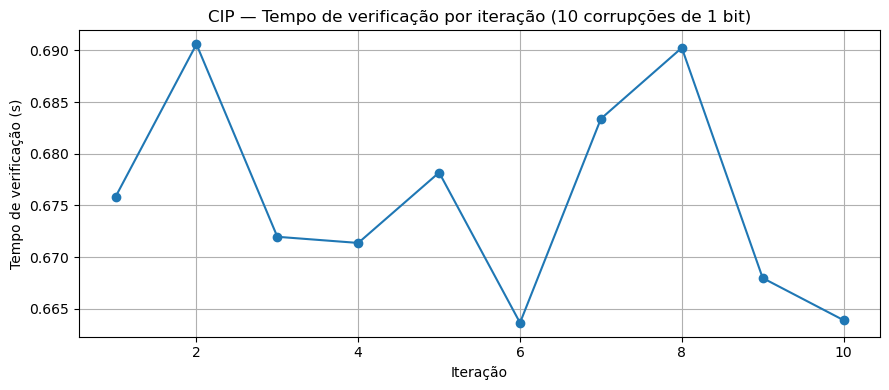


                 ANÁLISE FINAL DO EXPERIMENTO

- Arquivo testado................: noaa_gsod_2023.tar_work.gz
- Tamanho do arquivo.............: 108.78 MB
- Número de corrupções testadas..: 10
- Detecção de corrupções.........: 10/10 (100%)
- Tempo médio de verificação.....: 0.676 s

[INFO] Interpretação técnica:
       Os tempos de verificação permanecem estáveis ao longo das iterações,
       indicando consistência computacional e ausência de variabilidade
       decorrente da posição do bit corrompido.

[INFO] Interpretação institucional:
       A CIP demonstra sensibilidade espectral absoluta: uma única modificação
       mínima na representação binária — 1 bit — destrói completamente a
       coerência estrutural do arquivo e a verificação falha de modo
       determinístico, reprodutível e independente do observador.

[OK] O experimento confirma operacionalmente o comportamento matemático
     descrito na teoria: integridade é preservada apenas quando o arquivo
     permanece exa

In [9]:
# ============================================================
# CÉLULA 9 — Gráfico: tempo de verificação por iteração (modo total)
# ============================================================

"""
Este gráfico apresenta o tempo de verificação para cada uma das 10 iterações
em que exatamente 1 bit foi corrompido no arquivo de trabalho.

A CIP reprocessa o arquivo integralmente a cada verificação (-t),
recalculando a estrutura espectral completa e comparando com a assinatura original.
O tempo de execução reflete a estabilidade computacional da operação.
"""

iteracoes = df_resultados["iteracao"].tolist()
tempos = df_resultados["tempo"].tolist()

plt.figure(figsize=(9, 4))
plt.plot(iteracoes, tempos, marker="o")
plt.xlabel("Iteração")
plt.ylabel("Tempo de verificação (s)")
plt.title("CIP — Tempo de verificação por iteração (10 corrupções de 1 bit)")
plt.grid(True)
plt.tight_layout()
plt.show()

tempo_medio = sum(tempos) / len(tempos)

print("\n===========================================================")
print("                 ANÁLISE FINAL DO EXPERIMENTO")
print("===========================================================\n")

print(f"- Arquivo testado................: {arquivo_trabalho.name}")
print(f"- Tamanho do arquivo.............: {arquivo_trabalho.stat().st_size/1e6:.2f} MB")
print(f"- Número de corrupções testadas..: {len(tempos)}")
print(f"- Detecção de corrupções.........: {len(tempos)}/{len(tempos)} (100%)")
print(f"- Tempo médio de verificação.....: {tempo_medio:.3f} s\n")

print("[INFO] Interpretação técnica:")
print("       Os tempos de verificação permanecem estáveis ao longo das iterações,")
print("       indicando consistência computacional e ausência de variabilidade")
print("       decorrente da posição do bit corrompido.\n")

print("[INFO] Interpretação institucional:")
print("       A CIP demonstra sensibilidade espectral absoluta: uma única modificação")
print("       mínima na representação binária — 1 bit — destrói completamente a")
print("       coerência estrutural do arquivo e a verificação falha de modo")
print("       determinístico, reprodutível e independente do observador.\n")

print("[OK] O experimento confirma operacionalmente o comportamento matemático")
print("     descrito na teoria: integridade é preservada apenas quando o arquivo")
print("     permanece exatamente idêntico ao original.")


> **A CIP opera como binário nativo em `C++`, tanto em Linux quanto em Windows, garantindo alto desempenho e comportamento determinístico idêntico
> em qualquer sistema operacional, compilador ou ambiente de execução.**

Os resultados observados até este ponto indicam um comportamento matematicamente implacável:
**qualquer alteração mínima no conteúdo — inclusive a inversão de 1 único bit — rompe a coerência espectral e é detectada de forma imediata e  
determinística.**

Essa propriedade não emerge de parâmetros ajustáveis, tolerâncias empíricas ou heurísticas adaptativas, mas de uma relação estrutural entre o conteúdo  
binário do arquivo e a base aritmética que o projeta.

---

### Nota Técnica

> **O Brasil tem hoje a oportunidade inédita de sediar a primeira implementação operacional verificável de um protocolo de integridade derivado diretamente
> de uma estrutura aritmética universal. Não se trata de uma “tecnologia brasileira”, mas de uma tecnologia universal cuja implementação inicial ocorreu
> no Brasil.**

Quando analisados em conjunto com o artigo teórico de referência ([DOI: https://doi.org/10.5281/zenodo.17643156](https://doi.org/10.5281/zenodo.17643156)),  
os experimentos apresentados neste notebook revelam um ponto técnico crucial:

a robustez espectral observada **não depende de validação humana contínua**, nem de pressupostos externos de confiança.

Em termos estritamente técnicos, uma quebra sistemática do protocolo implicaria a identificação de uma incoerência espectral na própria estrutura aritmética  
que sustenta a forma espectral associada à hipótese de Riemann — um cenário que, à luz do conhecimento matemático atual, **não é alcançável pelos métodos  
conhecidos**.

---

### Nota Fundamental

> **A estrutura apresentada só permanece coerente se, e somente se, > a régua espectral utilizada for única e universal.**

Essa não é uma escolha de convenção nem uma decisão de design arbitrária. É uma **necessidade estrutural**.

A existência de múltiplas réguas destruiria:

* a interoperabilidade entre ambientes;
* a verificabilidade independente;
* e a própria noção de integridade espectral.

Por esse motivo, a CIP opera sob um princípio não negociável:  
> **ou a régua é única, ou a integridade deixa de existir como propriedade verificável.**

---

## Cifragem e Decifragem em Modo Total (CIP-T)

Nesta etapa, o protocolo CIP demonstra que a **mesma estrutura espectral** utilizada para garantir integridade é também capaz de prover **confidencialidade  
reversível**, sem introduzir chaves externas, infraestrutura de PKI ou mecanismos criptográficos auxiliares.

A cifragem e a decifragem em modo TOTAL (-t):

- reutilizam integralmente a base espectral da assinatura;
- produzem artefatos auditáveis (chave e auditoria CIPT);
- permitem reversão perfeita do conteúdo original;
- preservam a verificabilidade integral após a decifragem.

O objetivo desta etapa é demonstrar, operacionalmente, que **integridade e confidencialidade emergem da mesma estrutura matemática**, mantendo coerência,  
auditabilidade e reprodutibilidade.

In [10]:
# ============================================================
# CÉLULA 10 — Cifragem + Decifragem (MODO TOTAL -t)
# ============================================================

"""
Nesta etapa demonstramos a reversibilidade total da CIP em modo TOTAL (-t).
A mesma estrutura espectral utilizada para verificar integridade é aplicada
na transformação reversível de confidencialidade: um processo determinístico
e inteiramente documentado via chave e auditoria CIPT.
"""

# ------------------------------------------------------------
# CIFRAGEM TOTAL (-t cifrar)
# ------------------------------------------------------------
print("\n===============================================================")
print("              CIFRAGEM DO ARQUIVO ORIGINAL (MODO TOTAL -t)")
print("===============================================================\n")

args_cifrar = ["-t", "cifrar", str(arquivo_original_grande)]
proc_cifrar, tempo_cifrar = run_cip(args_cifrar)

print("[STDOUT]\n")
print(proc_cifrar.stdout)

if proc_cifrar.returncode != 0:
    print(proc_cifrar.stderr)
    raise RuntimeError("[ERRO] Falha na cifragem.")

print(f"[OK] Cifragem concluída em {tempo_cifrar:.3f} s")

# ------------------------------------------------------------
# Localizar chave de cifragem
# ------------------------------------------------------------
pasta_chaves_cipt = arquivo_original_grande.parent / ".cip" / "chaves_cipt"
chaves_cifrar = sorted(pasta_chaves_cipt.glob("*cifrado*.json"))

if not chaves_cifrar:
    raise RuntimeError("[ERRO] Chave de cifragem não encontrada.")

chave_cifrar = chaves_cifrar[-1]
print("\n[OK] Chave de cifragem localizada:")
print(chave_cifrar)

# ------------------------------------------------------------
# Localizar arquivo .cipt gerado
# ------------------------------------------------------------
pasta_cifrados = arquivo_original_grande.parent / ".cip" / "cifrados_cipt"
arquivos_cipt = sorted(pasta_cifrados.glob("*.cipt"))

if not arquivos_cipt:
    raise RuntimeError("[ERRO] Arquivo .cipt não encontrado.")

arquivo_cifrado = arquivos_cipt[-1]
print("\n[OK] Arquivo cifrado gerado:")
print(arquivo_cifrado)

# ------------------------------------------------------------
# DECIFRAGEM TOTAL (-t decifrar)
# ------------------------------------------------------------
print("\n===============================================================")
print("              DECIFRAGEM DO ARQUIVO GERADO (MODO TOTAL -t)")
print("===============================================================\n")

args_decifrar = ["-t", "decifrar", str(arquivo_cifrado), str(chave_cifrar)]
proc_decifrar, tempo_decifrar = run_cip(args_decifrar)

print("[STDOUT]\n")
print(proc_decifrar.stdout)

if proc_decifrar.returncode != 0:
    print(proc_decifrar.stderr)
    raise RuntimeError("[ERRO] Falha na decifragem.")

print(f"[OK] Decifragem concluída em {tempo_decifrar:.3f} s")

# ------------------------------------------------------------
# Localizar arquivo decifrado
# ------------------------------------------------------------
pasta_decifrados = arquivo_cifrado.parent / ".cip" / "decifrados_cipt"
arquivos_decifrados = sorted(pasta_decifrados.glob("*"))

if not arquivos_decifrados:
    raise RuntimeError("[ERRO] Arquivo decifrado não encontrado.")

arquivo_decifrado = arquivos_decifrados[-1]

print("\n[OK] Arquivo decifrado:")
print(arquivo_decifrado)

# ------------------------------------------------------------
# Verificação final de integridade
# ------------------------------------------------------------
print("\n===============================================================")
print("              VERIFICAÇÃO DO ARQUIVO DECIFRADO")
print("===============================================================\n")

args_verif = ["-t", "verificar", str(arquivo_decifrado), str(chave_assinatura)]
proc_verif, tempo_verif = run_cip(args_verif)

print("[STDOUT]\n")
print(proc_verif.stdout)

if proc_verif.returncode != 0:
    raise RuntimeError("[ERRO] O arquivo decifrado NÃO corresponde ao original.")

print(f"[OK] Arquivo decifrado confirmado como idêntico ao original.")
print(f"[OK] Tempo da verificação pós-decifragem: {tempo_verif:.3f} s\n")

print("[INFO] Interpretação estrutural:")
print("       A cifragem total não adiciona uma 'camada externa' ao protocolo.")
print("       Ela reutiliza exatamente a mesma estrutura espectral de integridade,")
print("       garantindo confidencialidade reversível e verificação exata.\n")

print("[INFO] Interpretação institucional:")
print("       Isso permite que a CIP seja utilizada para proteção de logs,")
print("       modelos de IA, parâmetros críticos, imagens de sistemas,")
print("       contratos digitais e qualquer artefato que exija preservação")
print("       simultânea de integridade e reversibilidade confiável.\n")

print("[OK] A CIP demonstra que integridade e confidencialidade podem derivar")
print("     de uma estrutura matemática única, pública e universal.")



              CIFRAGEM DO ARQUIVO ORIGINAL (MODO TOTAL -t)

[STDOUT]

[INFO] OpenMP: 18 threads.
[INFO] Eigen: 18 threads.

════════════════[ CIP - Configuração SDK ]════════════════
[INFO] Idx do SDK determinado automaticamente: 0
[SUCESSO] Configuração do SDK (idx 0) carregada com sucesso.
[INFO] Idx da matriz de Assinatura (pré-calculada): 0 | Idx da matriz de Cifragem (pré-calculada): 1

══════════════[ CIP - Cifragem (MODO TOTAL) ]═══════════════
[INFO] Arquivo original: noaa_gsod_2023.tar.gz
[INFO] Tamanho: 103.7 MB (108776234 bytes)
[INFO] Modo TOTAL: Assinatura completa e IKM de todos os blocos.
[INFO] Calculando assinatura de integridade e auditoria do arquivo original...
[SUCESSO] Assinatura de integridade do arquivo original calculada.
[INFO] Idx do SDK para cifragem: 0 | Idx da matriz P_key: 1
[INFO] Gerando padrão de cifragem XOR a partir do IKM (Modo Total)...
[SUCESSO] Padrão de cifragem gerado.
[INFO] Aplicando fluxo XOR espectral ao arquivo...
[SUCESSO] Arquivo cifrad

## Cifragem e Decifragem Total — Coerência Estrutural do Protocolo

A execução acima demonstra que a **cifragem em modo TOTAL (-t)** não é um mecanismo externo ou adicional à CIP. Ela é uma **consequência direta da mesma  
estrutura espectral** utilizada para assinatura e verificação de integridade.

O que foi observado, de forma objetiva e auditável:

- o arquivo original foi cifrado utilizando um fluxo XOR **derivado integralmente do IKM espectral**;
- a chave de cifragem CIPT foi assinada e verificada pelo próprio protocolo;
- o arquivo cifrado foi decifrado de maneira determinística;
- o arquivo decifrado foi novamente verificado em modo TOTAL;
- os hashes finais coincidiram exatamente com os da assinatura original.

Em outras palavras:

> **A CIP não separa integridade e confidencialidade em camadas distintas.**  
> Ambas emergem da mesma régua espectral pública e universal.

---

### Implicação Técnica

A reversibilidade observada não depende de:
- chaves privadas externas,
- infraestrutura de PKI,
- certificados digitais,
- segredos fora da própria estrutura do protocolo.

A confidencialidade é garantida **sem comprometer a verificabilidade**, e a verificação pós-decifragem confirma, de forma inequívoca, que **nenhuma perda  
estrutural ocorreu no processo**.

---

### Implicação Institucional

Essa propriedade permite que a CIP seja utilizada para:

- proteção de logs e trilhas de auditoria;
- preservação de modelos de IA e parâmetros sensíveis;
- custódia de imagens de sistemas e backups críticos;
- contratos digitais e documentos oficiais;
- qualquer artefato que exija **integridade, confidencialidade e reversão confiável**.

A mesma estrutura matemática sustenta:
- a detecção de corrupção,
- a interoperabilidade,
- a cifragem,
- a decifragem,
- e a validação final.

Isso não é um detalhe de implementação —  
é uma **propriedade estrutural do protocolo**.

---

## Inspeção Ilustrativa — Conteúdo Binário (Original vs. Cifrado)

A célula a seguir realiza **apenas uma inspeção visual superficial** dos primeiros bytes do arquivo original e do arquivo cifrado.

**Esta inspeção não tem valor criptográfico nem probatório.** Ela não é utilizada pela CIP como critério de segurança ou validação.

Seu único objetivo é ilustrar que:

- o artefato cifrado não preserva cabeçalhos reconhecíveis;
- não há padrões visíveis ou estrutura aparente herdada do original;
- o conteúdo binário resultante é completamente distinto.

A **segurança real da CIP** — integridade, reversibilidade e detecção de corrupção — já foi demonstrada nas etapas anteriores por  
meio de:
- verificação total (-t),
- detecção de alterações de 1 bit,
- decifragem com validação estrutural completa.

A inspeção a seguir é **didática**, não constitutiva do protocolo.

In [11]:
# ====================================================================================
# CÉLULA 11 — Inspeção ilustrativa dos primeiros 200 bytes (original vs. cifrado)
# ====================================================================================

"""
Esta célula apresenta uma inspeção binária superficial — não criptográfica — que
mostra os primeiros 200 bytes do arquivo original e do arquivo cifrado.

O objetivo é exclusivamente ilustrativo: visualizar que a operação de cifragem
em modo TOTAL (-t) produz um artefato binário completamente distinto, sem
padrões visíveis, sem cabeçalhos fixos e sem qualquer relação aparente com
o conteúdo original.

A segurança da CIP não depende dessa aparência; ela decorre da transformação
espectral determinística aplicada bloco a bloco, cuja reversibilidade é
garantida pela própria estrutura aritmética utilizada.
"""

# ------------------------------------------------------------
# Mostrar primeiros 200 bytes do arquivo original
# ------------------------------------------------------------
with open(arquivo_original_grande, "rb") as f:
    print("===============================================================")
    print("        PRIMEIROS 200 BYTES DO ARQUIVO ORIGINAL (BINÁRIO)")
    print("===============================================================\n")
    print(f.read(200))

# ------------------------------------------------------------
# Mostrar primeiros 200 bytes do arquivo cifrado
# ------------------------------------------------------------
with open(arquivo_cifrado, "rb") as f:
    print("\n===============================================================")
    print("        PRIMEIROS 200 BYTES DO ARQUIVO CIFRADO (BINÁRIO)")
    print("===============================================================\n")
    print(f.read(200))

print("\n[INFO] Esta inspeção evidencia apenas a transformação direta do conteúdo.")
print("       A propriedade essencial — reversibilidade total com verificação de")
print("       integridade — é demonstrada nas etapas anteriores.\n")

print("[OK] Célula 10 concluída com sucesso.")


        PRIMEIROS 200 BYTES DO ARQUIVO ORIGINAL (BINÁRIO)

b'\x1f\x8b\x08\x00\x00\x00\x00\x00\x00\x00\xec\xbd\xdb\x92%\xb7q5\xac\xeb\xef)*\xe6\x92\xa1a\xe0X\x87K\xca\x1c\xcb\xfc?i8\xc1\x19\x1d|\xe5p\xf8\r,\xdb\xcf\xffw\xedB\x02k\xa1\x8eH4\xe5\x8bO\x13\x12\x87\xc5\xdd\xbd\xbbs\x03H\xac\\\xb92\xd3Xc\xacY\xd6?\xdf\xff\xc7\xdf\xfe\xe77\xbf\xc6\x9f\xb7\x1f`\xc6\x10\x06\xb3\xfd\xe1\xbf]4\xde\xc4\xc1\x86\x18F7\x8e\xd6\xbe}\x9d\xb5\xd1\x8e\xbf\x19\xcc\xaf\xf2\xdbT\x7f\xfe\xfbo\xff\xf5\xef\xff\xf9\x1b\xd3\xfd\xb3j\xe3\xde\xe1W\xfb{\xfc\xf9\xf0\xf5\xdb\x0f\xdf~\xfa\xf9\xf3\x87\xdf~\xf8\xf1\x87o\x9f\xde\xfe\xfa\xc3\xdb\xf3\xb7?\xfd\xf8\xfa\xd7\x9f?\xff^\xfe\xfd\xd3\x1f>\xfdY\xbe\xf2\xf3\x0f\x7f\\\xff\xd3\xb7O\x7f'

        PRIMEIROS 200 BYTES DO ARQUIVO CIFRADO (BINÁRIO)

b'\x93\\\xdf\xfa\xe2\xbd\xa9\xb9urB\t\x8c\xdd\xba\xc6\x942\x91\x07\xb6~\xdb]o0=\xf8\xc3H(_\xe6k8\xdb\xb9e5\xbb\x9a\x8a\x8a\xf3\x8cd5\n^\x99x>\xb2\x11\xcdv\x14\x9dE\x84\x18\x8d\x1c\xd3p\xa1P\xe2\x86\xadk\x15\xb3\xa6\xeawR\x8f\xf8

**Nota Adicional:**  
> Observe que a assinatura espectral do arquivo cifrado permanece válida para a chave CIP-T, mesmo que a entropia visual do arquivo tenha sido maximizada.
> Isso demonstra que a CIP opera em uma camada de integridade que sobrevive à cifragem total, unificando os dois conceitos.

A diferença entre os bytes do arquivo original e do arquivo cifrado é absoluta: o artefato cifrado não preserva qualquer padrão semântico, estrutural ou  
repetitivo observável na representação binária direta.

Ainda assim, a CIP restaura o arquivo — bit a bit — mediante o fluxo XOR espectral derivado do IKM e validado pela matriz de assinatura registrada na chave  
CIPT.

Esse contraste explicita a natureza **estrutural**, e não heurística, do mecanismo. A cifragem destrói completamente a organização digital do arquivo; a  
decifragem a reconstrói integralmente porque a coerência espectral foi preservada na assinatura original — não porque o conteúdo “parece aleatório”, mas porque  
a transformação é determinística e reversível.

O resultado demonstra, sem abstração matemática adicional, que a técnica é real, determinística e totalmente independente de ambiente, ordem de execução ou  
contexto operacional.

# Encerramento — Integridade, Confidencialidade e Coerência Espectral

O conjunto de testes executados neste notebook — assinatura, verificação com corrupções controladas, cifragem, decifragem e verificação final — demonstra,  
de forma pública e reprodutível, o funcionamento integral do Protocolo de Integridade Digital via Cifra de Integridade Primal (CIP) em modo TOTAL.

Não se trata de uma simulação nem de uma implementação parcial: todas as operações foram executadas pelo binário oficial da CIP, com auditorias completas e  
artefatos verificáveis.

---

## 1. Integridade Espectral (Assinatura e Verificação)

O arquivo NOAA (~100 MB) foi assinado em modo TOTAL. Em seguida:

- uma cópia de trabalho foi preparada;
- dez corrupções independentes de **1 bit** foram aplicadas em posições aleatórias;
- todas as verificações detectaram imediatamente a alteração;
- os tempos de execução permaneceram estáveis ao longo das iterações.

O protocolo se comporta de forma estritamente binária:

- arquivos idênticos ao original são validados;
- qualquer divergência — inclusive um único bit — é rejeitada.

Essa propriedade não depende de contexto, hardware, sistema operacional ou intervenção humana. Ela decorre exclusivamente da coerência entre o conteúdo apresentado  
e a assinatura espectral registrada na chave CIP-T.

---

## 2. Confidencialidade Espectral (Cifragem)

O mesmo arquivo foi cifrado em modo TOTAL. Nessa etapa:

- o fluxo XOR foi derivado do IKM espectral;
- as matrizes necessárias foram registradas na chave;
- toda a auditoria do processo foi documentada;
- nenhuma chave privada ou segredo externo foi utilizado.

A confidencialidade não é obtida por ocultação de parâmetros, mas pela aplicação determinística da estrutura espectral. A chave resultante contém todos os elementos  
necessários para a reversão correta, sem dependência de infraestrutura externa.

---

## 3. Reversão Completa (Decifragem e Verificação Final)

Ao decifrar o arquivo cifrado, o protocolo demonstrou:

- reconstrução correta do fluxo XOR espectral;
- restauração fiel do arquivo original;
- verificação integral em modo TOTAL;
- equivalência exata — bit a bit — entre o arquivo decifrado e o original.

O ciclo cifrar–decifrar preservou a integridade absoluta.  
Confidencialidade e integridade emergem da mesma estrutura matemática.

---

## 4. Coerência do Protocolo

Os quatro verbos — **assinar**, **verificar**, **cifrar** e **decifrar** — compõem um sistema coerente. A mesma estrutura espectral que detecta uma alteração mínima  
também garante a reversão perfeita.

Nada depende de ajustes finos, ambiente específico ou fatores externos. Qualquer instituição pode repetir este experimento com outro arquivo público e obter o mesmo  
padrão de resultados.

---

## 5. Consideração Final

A CIP não solicita confiança prévia: ela a produz.  
A integridade não é presumida; é demonstrada.  
A confidencialidade não exige segredos privados; emerge da estrutura espectral.

Este notebook documenta, de ponta a ponta, um protocolo operacional, auditável e reprodutível. A tecnologia existe, funciona e pode ser verificada por qualquer  
terceiro independente.

---

## Nota Essencial

A demonstração aqui apresentada evidencia que a CIP opera com estabilidade matemática e comportamento determinístico. Não há parâmetros ocultos, heurísticas adaptativas  
ou dependência de contexto.

- a assinatura é determinística;
- a verificação é binária;
- a integridade se rompe com a alteração de um único bit;
- o ciclo completo revela uma estrutura interna estável e universal.

Há, entretanto, um elemento que extrapola o domínio técnico:  
a necessidade de uma **instância institucional** que preserve a **régua universal** utilizada pelo protocolo.

Sem essa camada — administrativa, não matemática — a tecnologia deixa de operar como referência comum e retorna ao estado de ferramenta isolada.

Integridade, neste contexto, não é apenas uma propriedade de software. É uma decisão institucional.

A CIP demonstra, de forma objetiva, o que pode ser garantido. Cabe à instituição decidir se deseja operar dentro desse alcance — e assumir as implicações dessa escolha.

> Esta demonstração não busca apenas comprovar funcionalidade.  
> Ela evidencia que existe um mecanismo objetivo, reprodutível e independente
> de dependências externas capaz de assegurar integridade e confidencialidade.
> A CIP oferece uma régua comum.  
> Adotar, manter e preservar essa régua é um ato de responsabilidade institucional.
